# SYDE 552 Assignment 2: Vision
### Due Monday, February 27, 8:00am
### Value: 15% of total marks for the course

This assignment covers the mammilian vision system, including both questions about the biology itself and constructing computational models based on Regression and Convolutional Neural Networks.

You can work in groups to do the assignment, but your answers and code must be original to you. Your submission will be a filled-out copy of this notebook (cells for code and written answers provided).

<h1><center>Eknoor Singh</center></h1>
<h1><center>20853256</center></h1>
<h1><center>Date: Feb 28 2023</center></h1>

# 1. The Vision System

The purpose of this part of the assignment is to test your knowledge of the brain’s visual system and the relationship between neurobiological features and computational properties. The best answers will discuss both function and anatomy, and will draw on specific anatomical examples to support theoretical claims. You are encouraged to discuss answers with your classmates, consult the slides notes, or use external resources -- but your answers must be your own! In particular, read the Kandel et al. chapters listed on the slides. Expect to write around 5 sentences for each 1 point.

**1.a) [2 marks]** The neurons in different parts of the brain are sensitive to different things, and can be thought of as different feature detectors.  For each of the types of neurons listed below, describe what feature they detect, their receptive fields, and how their connectivity to other neurons and/or their internal neural processes helps them to do this feature detection:
- Cones
- Sustained Ganglion Cells
- Transient Ganglion Cells
- Simple Cells

Cones are a type of photoreceptor in a primate's visual system that is responsible for providing vision during the day. There are 3 different types of cones, L-cones, M-cones, and S-cones, and they detect a varying range of wavelengths of light (longer, medium sized and shorter wavelengths respectively).  The conjuction of different types of cones allow for colour vision as they accept a range but colour is perceived/processed in the brain. The other kind of photoreceptor in the eye are rods, which allow for vision in low light settings. 

There are about 20 types of ganglion cells that have the job of creating features out of images collected by the photoreceptors. From the textbook (Kandel et. al), some of these features would be polarity, spatial resolution, temporal responsiveness, spectral filtering, and more. The sustained ganglion cells contribute to the features of polarity and temporal responsiveness. ON cells are excited by light while OFF cells are excited by dark spots. However, the sustained ganglion cells are constantly firing when stimulated for a duration after stimulation. The receptive field of a ganglion cell is a small relative region where light goes into the retina. In the receptive field, cells can distinguish between the center region and surrounding region of the light perceived.

Transient ganglion cells are quite similar to the capabilities to the sustained ganglion cells but are only excited when stimulus is exposed to the cell. The transient cells are also invovled in polarity and temporal responsiveness, as it's responsibilities of ON/OFF cells and it's transient response. If either light or dark stimulus excites its respective type of transient cell, then the cell is excited while the stimulus still exists, and stops when it is removed. This is different when compared to sustained ganglion cells as the response isn't held for seconds after excitation. The receptive field for transient ganglion cells is the same as sustained cells, a region where the stimulus interacts with the retina, producing a center and surrounding region.

Simple cells are cells that are responsible of producing the feature of orientation, with polarity regions of ON and OFF cells, as defined as their receptive fields. Bars of light act as stimuli to these cells as they are excited when stimulus enters the ON regions and leaves the OFF regions. The orientation of these bars of light are only accepted in a very tight margin by these receptive fields to invoke a response. 

**1. b) [1 marks]** Describe two instances where retinotopic organization facilitates visual processing.  For each example, be sure to mention its anatomical location and discuss how retinitopy contributes to the feature detection.

Retinotopic organization is the arrangement/organization of visual inputs, acting as a neural map of the visual field. One instance where this mapping aids the visual processing of cells is when ganglion cells receive information from their receptive field, the distinction of information is made between the center region and the surrounding region. This mapping of the visual field allows for distinction of what is the surrounding information from the central region, alongside other ganglion cells collecting overlapping information. This aids how ganglion cells interpret spatial resolution as it can better discern qualities of images that are fine or coarse with information from the surrounding region. Another instance of where retinotopic organization aids the visual system is creating commonly seen objects, producing the 'pop-out' effect to exist. In this case, images can be trained upon by the visual cortex is seen, allowing for distinction of other objects to exist based off their orientation and colour. The mapping of creating these images to resemble the object allows for this effect to exist.

**1. c) [2 marks]** Discuss the similarities and differences between convolutional neural networks and the visual system.

There are quite a few qualities that show similarity between CNNs and the visual system. From the initial raw data is collected by photoreceptors (rods and cones), the information pass through multiple stages of transformation like the ganglion cells, simple and complex cells. These stages of transformations and feature distinction are similar to the layers of CNNs while training. The convolutional and pooling layers in CNNs can draw comparisons to these biological cells that create the features before the image is sent to the brain. In a research paper that built a CNN that has retinal structure and ON/OFF ReLU (rectified linear unit), comparisons were drawn upon the network architecture of the CNN and biological parts of the visual system. There was likeness drawn between the following components; ganglion cells with ON/OFF concept with the ReLU, simple cells with convolutional layer and complex cells with pooling layer.

The biological visual system differs from a CNN as there are other inputs that can further influence how the information is perceived. Other sensory systems in the biological brain can act as inputs to alter the biological vision system, which isn't a part of CNNs. The CNN, that is representative of the visual cortex, is able to form layers that represent the biological cells related to visual processing but many more inputs are involved in a biological visual system.

Article: https://doi.org/10.1016/j.procs.2016.07.418

# 2. Classifying Stimuli Using Regression

The retina transforms the light entering an eye into a particular set of features, which are then sent to the rest of the brain for further processing.  In this section we look at how neurons might detect patterns, and how that detection changes with different feature detectors.

The data we will use for this is the classic MNIST dataset 

In [1]:
import torchvision
mnist = torchvision.datasets.MNIST(root='.', download=True)

The MNIST digits are 28x28 pixels each, each pixel is a value from 0 to 255, and there are 60,000 of them.  The raw data is in `mnist.data` and the target value (i.e. the actual digit) is in `mnist.targets`.  Here are the first 24 of each:

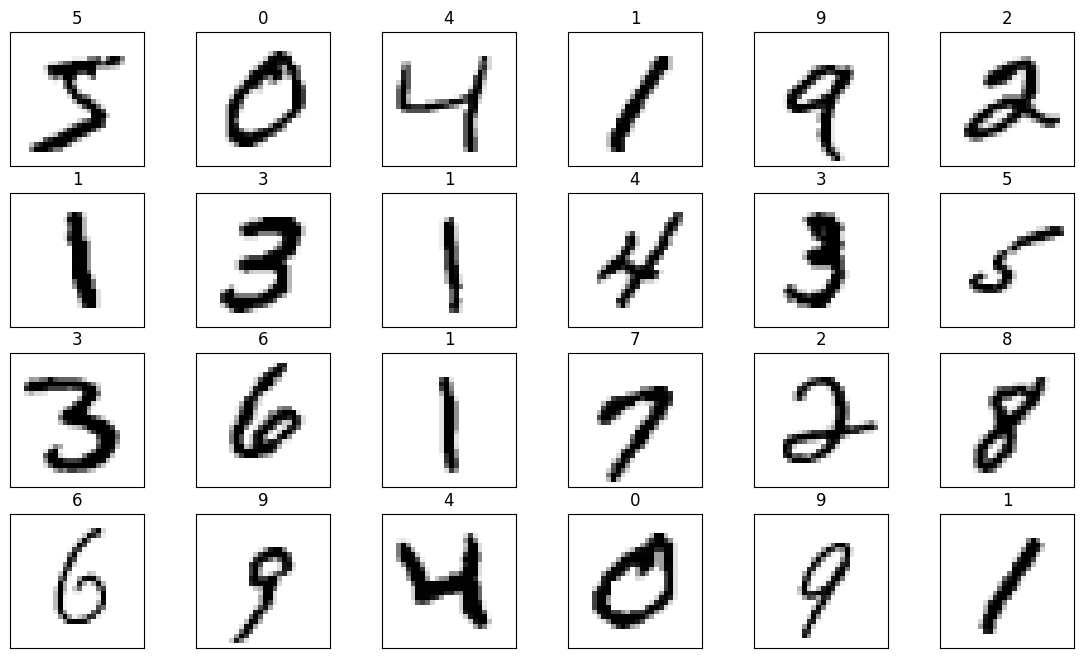

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(mnist.data[i], vmin=0, vmax=255, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(int(mnist.targets[i]))

**2.a) [1 mark]** We can imagine the MNIST digits as 784 (28 times 28) input neurons.  We want to connect these 784 neurons to 10 output neurons, one for each digit, and see how accurately we can classify the digits.  

To find the weights in this question, we will use Ridge Regression.  `X` is the MNIST input data, divided by 255 to rescale it to between 0 and 1, and then reshaped to be a 60000x784 matrix

```
X = mnist.data.reshape((60000,28*28)).float()/255
```

The target data T is a "one-hot" representation of our outputs.  That is, instead of the desired output to be `5`, the output should be `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]` and if the desired output should be `0`, that would be `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]`.  

```
T = torch.nn.functional.one_hot(mnist.targets).float()
```

If our output is `Y=X @ W`, we need to find `W` such that `Y` is as close as possible to `T`.  For Ridge Regression, this is computed as

```
W = torch.inverse(X.T @ X + lambd*I) @ (X.T @ T)
```

where `I` is an identity matrix of the correct size (`torch.eye(784).float()`) and `lambd` is the $\lambda$ parameter that stops the regression from overfitting.

When building any sort of classifier model, we generally want to create the model using one set of data, and then test it on another set of data.  Here, we will use the first 5,000 data points for creating ("training") the model, and the other 55,000 for testing:

```
N = 5000
X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing
```

Given this data, you should find `W` using *only* the `X_train` and `T_train` data.  Once you find `W` you can apply it to the `X_train` and `X_test` to get `Y_train` and `Y_test`

```
Y_train = X_train @ W
Y_test = X_test @ W
```

Finally, you can compute the accuracy by determining when the output is the correct category.  Here we will do this by counting when the largest output value in each row in `Y` is at the same spot as the largest output value in each row in `T`:

```
accuracy_train = torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train)
accuracy_test = torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test)
```

- Compute the training and testing accuracy when $\lambda=1$ and we use the first 5,000 data points as for training (and test on the remaining 55,000).  Report both numbers.  
- Do we expect the testing accuracy to be larger or smaller than the training accuracy?  Why?


In [27]:
import torch
import torchvision
mnist = torchvision.datasets.MNIST(root='.', download=True)

X = mnist.data.reshape((60000,28*28)).float()/255

T = torch.nn.functional.one_hot(mnist.targets).float()

lambd = 1
I = torch.eye(784).float()

N = 5000
X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing

W = torch.inverse(X_train.T @ X_train + lambd*I) @ (X_train.T @ T_train)

Y_train = X_train @ W
Y_test = X_test @ W

accuracy_train = torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train)
accuracy_test = torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test)
print(accuracy_train)
print(accuracy_test)


tensor(0.9034)
tensor(0.8192)


In the case of Lambda being 1, the training set's accuracy proved to be larger than the testing accuracy, 90.34% to 81.92% respectively. This outcome came as expected as the training set's accuracy was produced on images that the model trained upon. The test dataset was never exposed to the model, making it more difficult for the model to predict as compared to previously exposed data like the training data points.

**2. b) [2 marks]**  Repeat part a) but vary the value of `lambd` from $10^{-5}$ to $10^5$.   You can use a `for` loop such as `for lambd in np.logspace(-5, 5, 11):`.  

- Generate a single plot that shows the training and testing accuracy.  Make sure to label your axes and the lines on the plot.  

- What is the best value for `lambd` (i.e. the value for which we get the best training accuracy).  
- Why does changing `lambd` affect the accuracy?  
- Why would having a large `lambd` value be good for making a biologically realistic model?

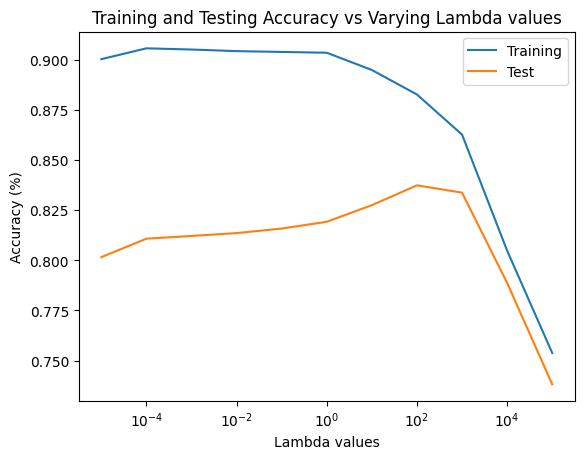

In [26]:
import torch
import torchvision
import numpy as np
mnist = torchvision.datasets.MNIST(root='.', download=True)

acc_train = []
acc_test = []
lambdas = []
for lambd in np.logspace(-5, 5, 11):
    X = mnist.data.reshape((60000,28*28)).float()/255

    T = torch.nn.functional.one_hot(mnist.targets).float()
    I = torch.eye(784).float()

    N = 5000
    X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
    T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing
    
    W = torch.inverse(X_train.T @ X_train + lambd*I) @ (X_train.T @ T_train)
    
    Y_train = X_train @ W
    Y_test = X_test @ W
    
    acc_train.append(torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train))
    acc_test.append(torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test))
    lambdas.append(lambd)
plt.title('Training and Testing Accuracy vs Varying Lambda values')
plt.plot(lambdas, acc_train, label='Training')
plt.plot(lambdas, acc_test, label='Test')
plt.xscale('log')
plt.legend()
plt.xlabel('Lambda values')
plt.ylabel('Accuracy (%)')
plt.show()


The lambda value that produced the highest accuracy in one of the categories was $10^{-4}$, as the training accuracy was the highest at this point. Other lambda values end up decreasing the accuracy in the training set.

The lambda values directly influence the variability of the weights in the model, as per the calculation in line 19 of the code segment above. The lambda terms are a penalty, acting as bounding parameters for the change in weights during the training of the model. The lower the lambda value, there is less strict bounds on how much the weights can change through training epochs, while large lambda values allow very little variation for the weights of the model during training. This in turn affects the accuracy of the model as the weights are directly responsible for how well the model performs.

Larger lambda values translate to a larger penalty term when completing the weights calculations. As shown in the graph above, smaller lambda values show great training accuracy but poor test accuracy. This is a common effect of overfitting of the model as the model become much too familiar with the training dataset and cannot accuractely predict the test dataset, which was never exposed to the model beforehand. The larger lambda values combat this effect as by better constraining the growth of the weights of the model. In a biological system, it would be best to avoid the system overfitting on information it has been previously exposed to, and mistake newly exposed information as something it has once saw. The larger lambda values achieve this goal as it would reduce the overfitting of the system on previously 'trained' data and would allow more accurate predictions on 'test' data.

**2. c) [1 mark]** The input we have used so far is not very realistic.  In real life, when we see written digits, they are under a wide range of lighting conditions. For this question, we change `X` by scaling it randomly and adding a random background brightness.

```
X = mnist.data.reshape((60000,28*28)).float()/255
X = X*(1-2*torch.rand(60000)[:,None]) + torch.rand(60000)[:,None]
```

To see what this looks like, here is how you can plot it:

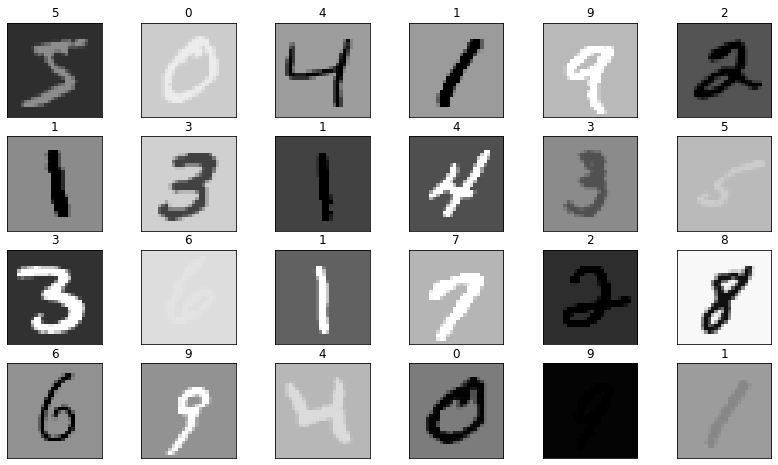

In [306]:
X = mnist.data.reshape((60000,28*28)).float()/255
X = X*(1-2*torch.rand(60000))[:,None] + torch.rand(60000)[:,None]

plt.figure(figsize=(14,8))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(X[i].reshape(28,28), vmin=0, vmax=1, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(int(mnist.targets[i]))


- Generate the same plot as in 2b) but for this new dataset.  
- Is this a harder or easier task than with the original dataset?
- Is this new dataset more like the data at the retina or like the data in the ganglion cells?
- Is the original dataset more like the data at the retina or like the data in the ganglion cells?

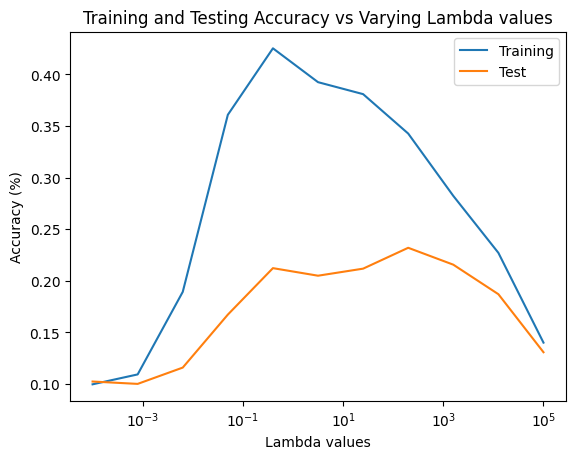

In [25]:
import torch
import torchvision
import numpy as np
mnist = torchvision.datasets.MNIST(root='.', download=True)

acc_train = []
acc_test = []
lambdas = []
for lambd in np.logspace(-4, 5, 11):
    X = mnist.data.reshape((60000,28*28)).float()/255
    X = X*(1-2*torch.rand(60000))[:,None] + torch.rand(60000)[:,None]

    T = torch.nn.functional.one_hot(mnist.targets).float()
    I = torch.eye(784).float()

    N = 5000
    X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
    T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing
    
    W = torch.inverse(X_train.T @ X_train + lambd*I) @ (X_train.T @ T_train)
    
    Y_train = X_train @ W
    Y_test = X_test @ W
    
    acc_train.append(torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train))
    acc_test.append(torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test))
    lambdas.append(lambd)
plt.title('Training and Testing Accuracy vs Varying Lambda values')
plt.plot(lambdas, acc_train, label='Training')
plt.plot(lambdas, acc_test, label='Test')
plt.xscale('log')
plt.legend()
plt.xlabel('Lambda values')
plt.ylabel('Accuracy (%)')
plt.show()


Assessing the training/test accuracies of 2b and 2c, this new transformed data proves to be harder to predict by the model. This is indicative of the graph results in 2a/2b vs 2c as accuracies are mostly >80% and <40% respectively, for both categories of training and testing.

This new dataset is more alike to the information at the retina/photoreceptors. The photoreceptors, like S-,M-,L-cones, are light retrieve data via light sensitivty and the wavelengths of the photons entering the retina. This means that images would contain much more pixels of varying light intensities as compared to when information is at the ganglion cells.

The old dataset (questions 2a/2b) are more alike to information at the ganglion cells. These images are much alike to the ON/OFF polarity that exists in the 20 ganglion-cell types. This results in spatial resolution and spectral filtering that is shown when comparing the old dataset to this newer dataset.

**2. d) [1 mark]** We can think of neurons in the visual system as transforming the data in various ways.  Given the dataset in 2c), neurons might be able to transform it to look more like the origin data.

Here are three data transformations that could be applied here:

Subtracting the Mean
```
X = X-torch.mean(X, axis=1)[:,None]
```

Absolute value
```
X = torch.abs(X)
```

Normalizing
```
X = X/torch.linalg.norm(X, axis=1)[:,None]
```

- Apply all three of them (in the order shown above) to the dataset and generate the same graph as in 2b) and 2c).
- How does the performance of the network compare to that of 2b) and 2c)?
- Do any of the three transformations above correspond to processing that occurs in the eye before the signal is sent to the rest of the brain?
- Given this result, why does the eye transform the data between raw rods & cones and the ganglion cells?

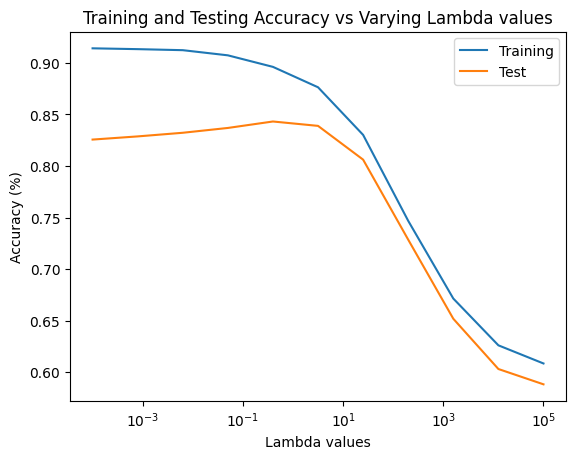

In [24]:
import torch
import torchvision
import numpy as np
mnist = torchvision.datasets.MNIST(root='.', download=True)

acc_train = []
acc_test = []
lambdas = []
for lambd in np.logspace(-4, 5, 11):
    X = mnist.data.reshape((60000,28*28)).float()/255
    X = X-torch.mean(X, axis=1)[:,None]
    X = torch.abs(X)
    X = X/torch.linalg.norm(X, axis=1)[:,None]

    T = torch.nn.functional.one_hot(mnist.targets).float()
    I = torch.eye(784).float()

    N = 5000
    X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
    T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing
    
    W = torch.inverse(X_train.T @ X_train + lambd*I) @ (X_train.T @ T_train)
    
    Y_train = X_train @ W
    Y_test = X_test @ W
    
    acc_train.append(torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train))
    acc_test.append(torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test))
    lambdas.append(lambd)
plt.title('Training and Testing Accuracy vs Varying Lambda values')
plt.plot(lambdas, acc_train, label='Training')
plt.plot(lambdas, acc_test, label='Test')
plt.xscale('log')
plt.xlabel('Lambda values')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


This model performs the best for lambda values <10 as both training and testing accuracies are the highest in the entirety of question 2. The training and testing accuracy remains above 82.5% which is better results than the graphs shown in 2a/2b/2c.

The transformations made by the mean,absolute value and normalizing are repersentative of transformations the eye completes before the image is sent to the brain. The idea of filtering images for contrast, focus and motion is done by functions in the eye and can repersent these transformations, although it may not be the same transformations completed by the eye.

The value of transforming the data between the photoreceptors to the ganglion cells are the topics touched upon in 2c and Kandel et. al textbook; polarity, spatial resolution, temporal responsiveness, spectral filtering, and other image features like motion. The images in 2c is much more difficult to discern as the raw image is lacking any type of features as mentioned. The transofmration between photoreceptors to ganglion cells allow for the addition of these features before being sent to the brain.

# 3. Classifying Stimuli Using Backpropogation

Regression is restricted to learning the layer of weights that produces the final output.  If we want to also learn what features are most useful for producing that output, we need a more complex learning rule, and this is typically backpropogation.  Here we will classify the same data as in question 2, and we will build up different network structures to do so.

Backpropogation tends to work best when learning on a bunch of data at the same time (a "batch").  The following code will set up the same training and testing data as in question 2, but presented in randomized batches of 1000 at a time.

```python
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)
```

To create a neural network, we need to define what the weights are we will learn and we need to define the computation that the network will perform.  Here is the definition of a simple network that has an input of 784 values (the MNIST inputs), which go to 50 "hidden"-layer neurons, and then to the output 10 neurons.  So the network will learn to transform the 784 inputs into 50 new representations, and from those 50 features it will learn weights to create an output of 10 values (our 10 categories).  This is known as a multi-layer perceptron, or a standard neural network with a single hidden layer.

```python
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    
network = Net()
```

Finally, we need to train our model.  When training, it is useful to keep track of how well the model is doing on the testing data.  Since testing the network takes time, we don't necessarily want to do it all the time.  Instead, the following code trains the network 10 times, and then records how well the network does on the training data and on the testing data.

In [403]:
# create the learning rule
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,   # learning rate
                      momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


Given the above code, you can train your network 10 times by doing

```python
for i in range(10):
    continue_training()
```

If you want to continue training even more, you can just run that `for` loop again.

To plot the final accuracy results, you can use

```python
plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()
```

**3. a) [1 mark]** Run the model above for 10 iterations (i.e. call `continue_training` 10 times).

- Plot the training and testing accuracy.  
- Is this model better or worse than the best models developed in question 2?

C:\Users\amoli\AppData\Local\Temp\ipykernel_24976\531253694.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.8482000231742859
Iteration 1 Testing accuracy: 0.8465999960899353
Iteration 2 Training accuracy: 0.8985999822616577
Iteration 2 Testing accuracy: 0.8855999708175659
Iteration 3 Training accuracy: 0.9151999950408936
Iteration 3 Testing accuracy: 0.8962000012397766
Iteration 4 Training accuracy: 0.9240000247955322
Iteration 4 Testing accuracy: 0.900600016117096
Iteration 5 Training accuracy: 0.9291999936103821
Iteration 5 Testing accuracy: 0.902400016784668
Iteration 6 Training accuracy: 0.9358000159263611
Iteration 6 Testing accuracy: 0.9035999774932861
Iteration 7 Training accuracy: 0.9394000172615051
Iteration 7 Testing accuracy: 0.9056000113487244
Iteration 8 Training accuracy: 0.9431999921798706
Iteration 8 Testing accuracy: 0.9065999984741211
Iteration 9 Training accuracy: 0.9462000131607056
Iteration 9 Testing accuracy: 0.9079999923706055
Iteration 10 Training accuracy: 0.9491999745368958
Iteration 10 Testing accuracy: 0.9071999788284302


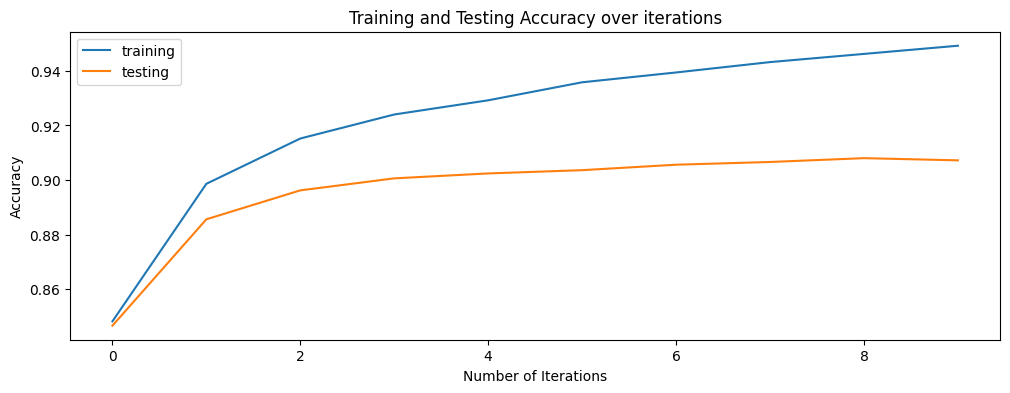

In [21]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    
network = Net()

mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

# create the learning rule
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,   # learning rate
                      momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

for i in range(10):
    continue_training()
    
plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over iterations')
plt.show()

This model is performing better than all models developed in question 2. The best performing model in question 2 was in 2b with a training and testing accuracy of 88% and 83% respectively, while the model performs at 94% and 90% training and testing accuracies respectively.

**3. b) [1 mark]** Repeat question 3a five times.  This does not mean to run a single model for 50 iterations.  Rather, you need to reset the model and train it again.  The easiest way to do this is to recreate the network and the optimizer like this:

```python
network = Net()
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,
                      momentum=0.5)
```

- Make a plot showing the 5 different training accuracies and 5 different testing accuracies
- Also show the average training and testing accuracy on the plot.
- Each of the 5 models should show slightly different accuracies.  Why is this the case?


C:\Users\amoli\AppData\Local\Temp\ipykernel_24976\2709231281.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.8651999831199646
Iteration 1 Testing accuracy: 0.8587999939918518
Iteration 2 Training accuracy: 0.9007999897003174
Iteration 2 Testing accuracy: 0.8858000040054321
Iteration 3 Training accuracy: 0.9147999882698059
Iteration 3 Testing accuracy: 0.8949999809265137
Iteration 4 Training accuracy: 0.9258000254631042
Iteration 4 Testing accuracy: 0.8984000086784363
Iteration 5 Training accuracy: 0.9327999949455261
Iteration 5 Testing accuracy: 0.9035999774932861
Iteration 6 Training accuracy: 0.9368000030517578
Iteration 6 Testing accuracy: 0.9034000039100647
Iteration 7 Training accuracy: 0.9416000247001648
Iteration 7 Testing accuracy: 0.90420001745224
Iteration 8 Training accuracy: 0.9452000260353088
Iteration 8 Testing accuracy: 0.9082000255584717
Iteration 9 Training accuracy: 0.9503999948501587
Iteration 9 Testing accuracy: 0.9074000120162964
Iteration 10 Training accuracy: 0.9549999833106995
Iteration 10 Testing accuracy: 0.9082000255584717
Iteration 

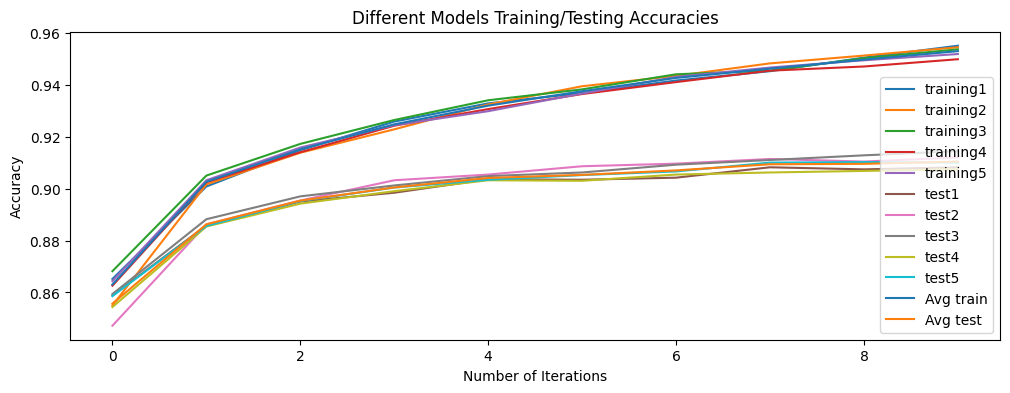

In [22]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torch
import numpy as np

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    


mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

train_total = []
test_total = []
avg_train = []
avg_test = []
for i in range(5):
    network = Net()
    # create the learning rule
    optimizer = optim.SGD(network.parameters(), 
                          lr=0.1,   # learning rate
                          momentum=0.5)
    
    # variables to keep track of the training and testing accuracy
    accuracy_train = []
    accuracy_test = []
    
    def continue_training():
        network.train()      # configure the network for training
        for i in range(10):  # train the network 10 times
            correct = 0
            for data, target in train_loader:       # working in batchs of 1000
                optimizer.zero_grad()               # initialize the learning system
                output = network(data)              # feed in the data 
                loss = F.nll_loss(output, target)   # compute how wrong the output is
                loss.backward()                     # change the weights to reduce error
                optimizer.step()                    # update the learning rule
                
                pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
                correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
        # update the list of training accuracy values
        score = float(correct/len(train_loader.dataset))
        accuracy_train.append(score)
        print('Iteration', len(accuracy_train), 'Training accuracy:', score)
        
        correct = 0
        network.eval()
        for data, target in test_loader:    # go through the test data once (in groups of 1000)
            output = network(data)                               # feed in the data
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
        # update the list of testing accuracy values
        score = float(correct/len(test_loader.dataset))
        accuracy_test.append(score)
        print('Iteration', len(accuracy_test), 'Testing accuracy:', score)
    
    for i in range(10):
        continue_training()
    train_total.append(accuracy_train)
    test_total.append(accuracy_test)

for i in range(10):
    sum_train = 0
    sum_test = 0
    for j in range(5):
        sum_train += train_total[j][i]
        sum_test += test_total[j][i]
    avg_train.append(sum_train/5)
    avg_test.append(sum_test/5)

plt.figure(figsize=(12,4)) 
plt.plot(train_total[0], label='training1')
plt.plot(train_total[1], label='training2')
plt.plot(train_total[2], label='training3')
plt.plot(train_total[3], label='training4')
plt.plot(train_total[4], label='training5')
plt.plot(test_total[0], label='test1')
plt.plot(test_total[1], label='test2')
plt.plot(test_total[2], label='test3')
plt.plot(test_total[3], label='test4')
plt.plot(test_total[4], label='test5')
plt.plot(avg_train, label='Avg train')
plt.plot(avg_test, label='Avg test')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Different Models Training/Testing Accuracies')
plt.show()


Each model is recreated and has to be trained over the training dataset. During these training epochs, the weights will be adjusted accordingly as the model trains itself, but none of these models will adjust their weights the same exact way as the other. This allows for the variation for performance in testing and training accuracies as all the models differ slightly in the weights within the layer.

**3. c) [1 mark]** Repeat question 3b varying the number of neurons in the hidden layer of the network.  The current value is 50.  Try it with 5, 10, 20, 50, and 100 neurons.  For each number of neurons, repeat five times and take the average (like in question 3b).  

- Plot the final testing accuracy on the y-axis and the number of neurons on the x-axis.  Note that to speed things up you can remove the testing computation from continue_training until the very end, since we only need the final testing score.


Layers:
5


C:\Users\amoli\AppData\Local\Temp\ipykernel_24976\3510224765.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.5982000231742859
Iteration 1 Testing accuracy: 0.5989999771118164
Iteration 2 Training accuracy: 0.7394000291824341
Iteration 2 Testing accuracy: 0.7228000164031982
Iteration 3 Training accuracy: 0.7907999753952026
Iteration 3 Testing accuracy: 0.7706000208854675
Iteration 4 Training accuracy: 0.8266000151634216
Iteration 4 Testing accuracy: 0.800000011920929
Iteration 5 Training accuracy: 0.8528000116348267
Iteration 5 Testing accuracy: 0.8240000009536743
Iteration 6 Training accuracy: 0.864799976348877
Iteration 6 Testing accuracy: 0.8327999711036682
Iteration 7 Training accuracy: 0.8737999796867371
Iteration 7 Testing accuracy: 0.8388000130653381
Iteration 8 Training accuracy: 0.8805999755859375
Iteration 8 Testing accuracy: 0.8446000218391418
Iteration 9 Training accuracy: 0.8862000107765198
Iteration 9 Testing accuracy: 0.8474000096321106
Iteration 10 Training accuracy: 0.8902000188827515
Iteration 10 Testing accuracy: 0.847000002861023
Iteration 1

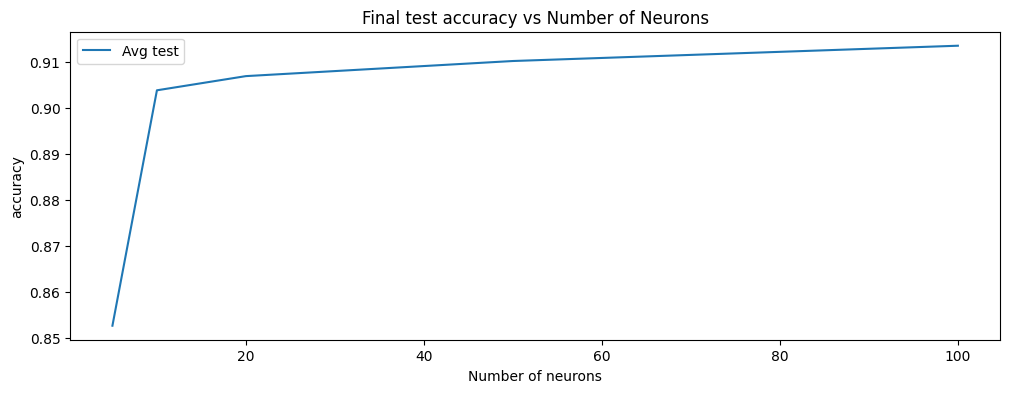

In [18]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torch
import numpy as np

class Net(nn.Module):
    def __init__(self,HL):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, HL)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(HL, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    


mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

avg_test = []
layers = [5,10,20,50,100]
for j in layers:
    test_total = []
    print("Layers:")
    print(j)
    for i in range(5):
        network = Net(j)
        
        # create the learning rule
        optimizer = optim.SGD(network.parameters(), 
                              lr=0.1,   # learning rate
                              momentum=0.5)
        
        # variables to keep track of the training and testing accuracy
        accuracy_train = []
        accuracy_test = []
        
        def continue_training():
            network.train()      # configure the network for training
            for i in range(10):  # train the network 10 times
                correct = 0
                for data, target in train_loader:       # working in batchs of 1000
                    optimizer.zero_grad()               # initialize the learning system
                    output = network(data)              # feed in the data 
                    loss = F.nll_loss(output, target)   # compute how wrong the output is
                    loss.backward()                     # change the weights to reduce error
                    optimizer.step()                    # update the learning rule
                    
                    pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
                    correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
            # update the list of training accuracy values
            score = float(correct/len(train_loader.dataset))
            accuracy_train.append(score)
            print('Iteration', len(accuracy_train), 'Training accuracy:', score)
            
            correct = 0
            network.eval()
            for data, target in test_loader:    # go through the test data once (in groups of 1000)
                output = network(data)                               # feed in the data
                pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
                correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
            # update the list of testing accuracy values
            score = float(correct/len(test_loader.dataset))
            accuracy_test.append(score)
            print('Iteration', len(accuracy_test), 'Testing accuracy:', score)
        
        for k in range(10):
            continue_training()
        test_total.append(accuracy_test[9])
    avg_test.append(sum(test_total)/5)

plt.figure(figsize=(12,4)) 
plt.plot(layers,avg_test, label='Avg test')
plt.legend()
plt.xlabel('Number of neurons')
plt.ylabel('accuracy')
plt.title('Final test accuracy vs Number of Neurons')
plt.show()


**3. d) [2 marks]** Now we will add a convolution layer to our network.  The following network adds two convolution layers before two normal neural network layers.

```python
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)  # set the size of the convolution to 5x5, and have 12 of them
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # make sure to do max pooling after the convolution layers
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
```

The following code can be used to plot the learned features in the first layer:
```python
plt.figure(figsize=(12,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()
```

- Train the model through 40 iterations and generate a plot of training and testing accuracy over time.
- Does this perform better or worse than the previous models in this assignment?
- What advantages and disadvantages do you see with this approach (in comparison to the previous parts of the assignment)?
- Plot the features learned by the first convolution layer.  How do they compare to real features detected in the V1 area of the brain?

C:\Users\amoli\AppData\Local\Temp\ipykernel_24976\2943932074.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 1 Training accuracy: 0.6197999715805054
Iteration 1 Testing accuracy: 0.7311999797821045
Iteration 2 Training accuracy: 0.9383999705314636
Iteration 2 Testing accuracy: 0.9264000058174133
Iteration 3 Training accuracy: 0.9611999988555908
Iteration 3 Testing accuracy: 0.9383999705314636
Iteration 4 Training accuracy: 0.9711999893188477
Iteration 4 Testing accuracy: 0.9485999941825867
Iteration 5 Training accuracy: 0.9801999926567078
Iteration 5 Testing accuracy: 0.9508000016212463
Iteration 6 Training accuracy: 0.9861999750137329
Iteration 6 Testing accuracy: 0.9508000016212463
Iteration 7 Training accuracy: 0.9894000291824341
Iteration 7 Testing accuracy: 0.9556000232696533
Iteration 8 Training accuracy: 0.9927999973297119
Iteration 8 Testing accuracy: 0.9588000178337097
Iteration 9 Training accuracy: 0.9947999715805054
Iteration 9 Testing accuracy: 0.9602000117301941
Iteration 10 Training accuracy: 0.9968000054359436
Iteration 10 Testing accuracy: 0.9592000246047974
Iteratio

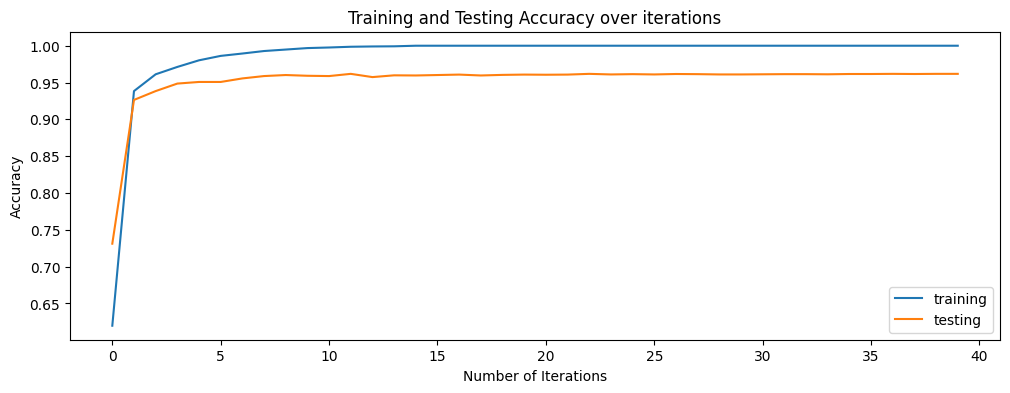

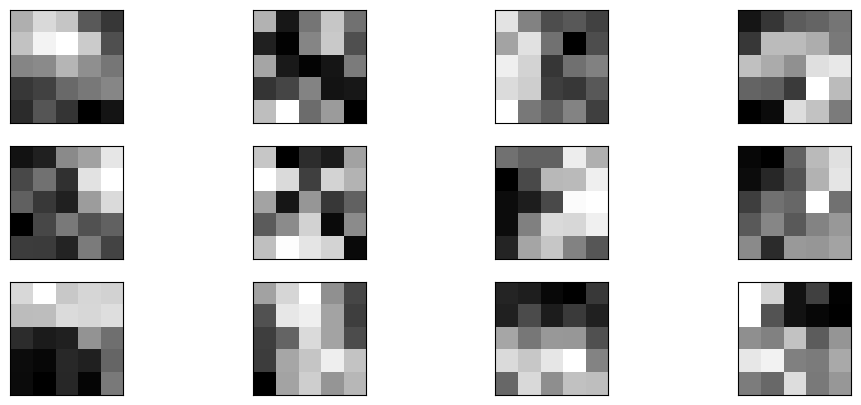

In [28]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)  # set the size of the convolution to 5x5, and have 12 of them
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # make sure to do max pooling after the convolution layers
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
    
network = Net()

mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

# create the learning rule
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,   # learning rate
                      momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

for i in range(40):
    continue_training()
    
plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over iterations')
plt.show()

plt.figure(figsize=(12,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

This model performs much better than all the previous models created in this assignment. The training and testing accuracies of the model created peaked at 100% and 96.17% respectively. Comparing this to the best performing model, which was in question 3c, the use of 100 neurons in the hidden layer only produced training and testing accuracys of ~95% and ~91% respectively.

**BONUS [1 mark]** Try to improve the neural network.  You want to get the best testing accuracy you can.  Try at least two different approaches and report your results.